## Hackathon Agent Based Modeling: Apple Trading Hackathon

This hackathon is open to anyone, any major. In this hackathon, you will be experimenting with a fun turtle environment -- navigating mazes, drawing designs, and if you want, hacking the internals to create new mazes or change the animal to something else.  You'll be using Python and Google CoLab and practicing strong programming fundamentals here (loops, lists, if/else statements, and functions).  In terms of assumed knowledge, as long as you know some basic Python, you should be able to participate. We will provide instructions to set up Google Colab, but if you want, you can do that ahead of time.

This material is based in part on https://mesa.readthedocs.io/en/stable/tutorials/intro_tutorial.html
And on https://cs4all.cs.unm.edu/cs108.html

### The first task is to set up Google CoLab (if you haven't already)
1. Create a Google account (if you don't already have one)
2. Go into Google Drive
3. On the right side of Google Drive, click the plus sign, to install add ons
   - Search for Colaboratory, and install it
   - If you've already installed Colaboratory (or Colab for short) skip this step
4. Upload this file into Google Drive, and double click on it!
   - First you need to download this file to your laptop/desktop
   - So, go to this web address and click the download button (downward arrow)
   
     https://tinyurl.com/yc6mnhwe
     
     
If the tinyurl shortener doesn't work, you can also use this address  

https://github.com/jbschroder/CS108/blob/main/notebooks10_hackathons/apple_trading_hackathon.ipynb

### Next, if you've never used notebooks before, don't worry!  They are very simple.
- There are text cells (like this one).  Text cells let you add commentary
- And, there are code cells where you put Python code
   - To run a code cell, hover your mouse over that cell, and just click the little triangle "play" or "execute" button 
   - Run the two cells below

Note: You create new cells by clicking on the `+ Code` and `+ Text` buttons in Colab

In [3]:
# Define some_list
some_list = ['apples', 'oranges']

In [4]:
# 1. Run the above cell in order to create some_list
#    Python will remember some_list, and now we can print it to the screen
# 2. Next, run this cell
print(some_list[0])
print(some_list[1])

apples
oranges


### Next, we briefly discuss Agent Based Modeling, which is what we use for this hackathon.  

### Agent Based Modeling (ABM)

- Tool for studying complex adaptive systems
- Example: termites model
    - The model consists of agents, an environment, and interactions between agents and environment
    - The system is adaptive and changes over tiem
    - ABM generates emergent patterns
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/termites_netlogo.png" width="250">


### Agent based modeling (ABM) modeling phases
- Setup: instantion (creation) of world
    - Describe the world you will be modeling and the rules that describe it
- Runtime loop: the agents put into motion.  Each iteration: 
    - Each agent changes it's state (say, gets more apples, or a tree catches on fire)
    - Any needed changes to world also occur, like a resource is consumed or added to    
- Exit

### Visualize ABM like this
<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/agent_based_modeling.png" width="300">

### There are three main abstractions
1. Agents with rules
2. There is an environment or model within which the agents live
    - This would be a grid for apple trading, where traders walk around
    - This would be a forest grid for the forest fire model
3. Time: time is dictated (controlled) by a the runtime loop.
    - Each loop iteration is one tick or one step of abstracted time
    - You could think of a step as lasting one second, one hour, one day, ..., whatever makes sense for your simulation

<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/agent_based_modeling.png" width="300">

### ABM Summary

1. ABM uses three main abstractions
    - Agents with rules
    - Environment or model within which the agents live
        - This would be a grid for apple trading, where traders walk around
    - Time: time is dictated (controlled) by a the runtime loop.
        - Each loop iteration is one tick or one step of abstracted time
    

2. ABM model is a representation of the interaction of real-world objects in a complex system
    - The goal is to gain an understanding of how the model's results relate to real-world phenomena
    - Random factors built into the model and variables changed by the user (you) cause different results to be generated each time a model is run
        - When you run a model many times, each time you get a different outcome
    - We are constructing a model, not a replica    

### For agent based modeling (ABM), we will be using Mesa

https://github.com/projectmesa/mesa

### First, you have to make sure that Mesa is installed
- Run the below cell

In [5]:
! pip install mesa==2.1.1


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


### Next, we import our modeling tools
- Run the below cell
- Note that Pandas and Seaborn or "built-in" packages, so we only have to import them, not install them

In [6]:
import mesa

# Data visualization tools.
import seaborn as sns

# Data manipulation and analysis.
import pandas as pd

### Now, we can begin creating our apple trading agent based model (ABM)

### First, we define the Agent object, called AppleTraderAgent
- Notice how this object inherits from the class `mesa.Agent`
- This inheritance allows Mesa to use our object
    - For instance, the function call `super.__init__(unique_id, model)` instantiates (creates) all the stuff related to the parent class `mesa.Agent`

    - This inheritance is a key point
    
- Each Step, 
    - If an agent has an apple
    - Choose one agent at random and give them an apple
    - Remember that the model step calls each agent step in random order

- This is like all the agents are in a room, trading at random with each other


In [7]:
# Create ABM

# 1. Define the Agent Abstraction
class AppleTraderAgent(mesa.Agent):
    """An agent that trades apples and begins with 1 apple."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's number of apples and set initial value
        self.NumberApples = 1

    def step(self):
        # Verify agent has some apples
        if self.NumberApples > 0:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent is not None:
                other_agent.NumberApples += 1
                self.NumberApples -= 1
                
        print("Hi, I am an apple trading agent", self.unique_id, "and I have ", self.NumberApples, "Apples")
            

### Next, we create our AppleTradingModel. 

### This defines two more of our key abstractions:
1. This defines the environment where the agents (apple traders) exist
2. This also defines how to take a step (tick) forward in time
    - The `step` function describes how to step forward in the runtime loop

### Similar to the agent, the AppleTradingModel inherits from `mesa.Model`
- This inhertiance is key and allows Mesa to use our model
- The `__init__` function describes how to create the environment and agents, using inheritance
- The `step` function describes how to step forward in the runtime loop
    - Each model step, in turn will call every Agent's step 


In [8]:
# 2. Define the Model (or environment) Abstraction for the Agents to live in
class AppleTradingModel(mesa.Model):
    """A model with some number of apple trading agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = AppleTraderAgent(i, self)
            # Add the agent to the scheduler
            self.schedule.add(a)

    # 3. Define each step or time tick: 
    #    Each step or tick will call the AppleTraderAgent.step() function once
    def step(self):
        """Advance the model by one step."""

        # The model's step will call the step method of each agent
        self.schedule.step()

### And now to run the model, the syntax is easy!
1. We first create a new AppleTradingModel object called `model`
2. Then, we take 100 steps with the model

### Key Point: Running `AppleTradingModel.step()` once, in turn runs `AppleTraderAgent.step()` once for each agent

### Key Point: Remember that the agents act in a random order
  - Each `model.step()` every agents acts once, but in a random order
    


### Task: Run the below cell a few times.  Note how the agents are executed in a random order each time.
- Randomness is important in computing!

In [10]:
# Create AppleTradingModel object called starter_model
# --> This creates a model with 10 Agents
starter_model = AppleTradingModel(10)

# Take one single step in the Runtime loop
starter_model.step()

Hi, I am an apple trading agent 4 and I have  0 Apples
Hi, I am an apple trading agent 5 and I have  0 Apples
Hi, I am an apple trading agent 8 and I have  0 Apples
Hi, I am an apple trading agent 3 and I have  1 Apples
Hi, I am an apple trading agent 1 and I have  0 Apples
Hi, I am an apple trading agent 0 and I have  0 Apples
Hi, I am an apple trading agent 2 and I have  0 Apples
Hi, I am an apple trading agent 7 and I have  0 Apples
Hi, I am an apple trading agent 6 and I have  2 Apples
Hi, I am an apple trading agent 9 and I have  0 Apples


### Task: Add a print statement to the AppleTradingModel Step() function that prints "Taking Step"
- In this way, every time you take a step, your model should print "Taking Step"

### Then, run the above cell a few times.  Make sure you're comfortable with the basics of creating models and taking steps with them

### Task: Remove both of the above print statements, that is remove the print statement in the AppleTradingModel and  the AppleTraderAgent

### Task:  Change the below cell to do that following
1. Create a model with 20 agents (not 10)
2. Use a loop to take 50 steps
3. Create a list called `all_agents_NumberApples` that contains every agent's number of apples

    That is, 

          all_agents_NumberApples[0] 

    should contain the number of apples that agent 0 owns.  And in general

          all_agents_NumberApples[k] 

    should contain the number of apples that agent k owns. 

    You can cycle through all the agents with a loop like this.

        for agent in model.schedule.agents:
            print(agent.NumberApples)


4. Then run the below plotting cell (two cells below).  This should generate a nice histogram
    - We visualize how many apples each agent has
    - We add the `%matplotlib inline` command, which ensures that plots appear (and aren't hidden)

In [11]:
# Change this cell according to above, and then run
model = AppleTradingModel(10)
model.step()

# Make sure to create a list all_agents_NumberApples and give it the above discussed values


Hi, I am an apple trading agent 9 and I have  0 Apples
Hi, I am an apple trading agent 4 and I have  0 Apples
Hi, I am an apple trading agent 2 and I have  0 Apples
Hi, I am an apple trading agent 1 and I have  0 Apples
Hi, I am an apple trading agent 0 and I have  1 Apples
Hi, I am an apple trading agent 8 and I have  1 Apples
Hi, I am an apple trading agent 7 and I have  2 Apples
Hi, I am an apple trading agent 5 and I have  0 Apples
Hi, I am an apple trading agent 6 and I have  0 Apples
Hi, I am an apple trading agent 3 and I have  4 Apples


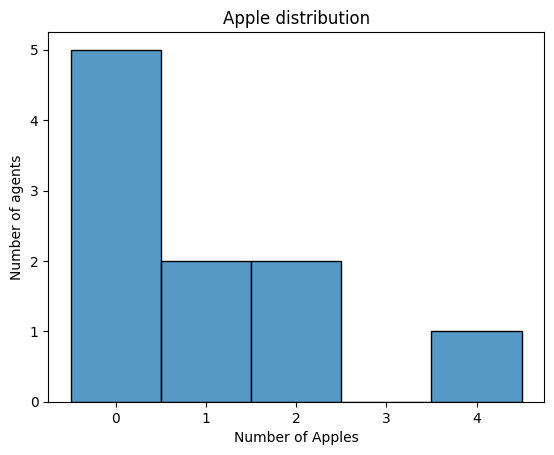

In [12]:
%matplotlib inline

# Store our data in a Pandas dataframe
df = pd.DataFrame({'all_agents_NumberApples': all_agents_NumberApples})

# Create a histogram with seaborn
ax = sns.histplot(df['all_agents_NumberApples'], discrete=True)
ax.set(title="Apple distribution", xlabel="Number of Apples", ylabel="Number of agents" )

max_apples_owned = df['all_agents_NumberApples'].max() + 1
ax.set_xticks(range(0,max_apples_owned), labels=range(0,max_apples_owned));

### Open-ended Hackathon Portion

### Decide on something fun and interesting to do!  How could you make the above model more realistic or interesting?  Here are a few ideas to get you going, but you should explore your own ideas

1.	Effect of adding consumption of apples.  Here each trader could receive a new apple every K turns and eat an apple every M turns, where you need to choose K and M to be reasonable.

2.	Effect of dishonest trading.  Here, some traders would skip giving apples to other traders sometimes (but perhaps not all the time).

3.	Effect of implementing a tax that takes away apples from some traders and gives those apples to other traders.  You will need to design the tax.

4.	Effect of having two items or commodities to trade (say, apples and bananas).  Perhaps, two bannas equals one apple?  Perhaps the traders have a preference of one commodity over the other?

5.  Insert your idea here!  
